# 使用scipy.io下载 .mat文件
得到的是字典格式，键值对

In [1]:
import scipy.io as scio
import matplotlib.pyplot as plt
%matplotlib inline

E1 = scio.loadmat('DB2/S1_E1_A1.mat')
E2 = scio.loadmat('DB2/S1_E2_A1.mat')
E3 = scio.loadmat('DB2/S1_E3_A1.mat')

print(E1.keys())
print(E2.keys())
print(E3.keys())


dict_keys(['__header__', '__version__', '__globals__', 'emg', 'acc', 'stimulus', 'glove', 'inclin', 'subject', 'exercise', 'repetition', 'restimulus', 'rerepetition'])
dict_keys(['__header__', '__version__', '__globals__', 'emg', 'acc', 'stimulus', 'glove', 'inclin', 'subject', 'exercise', 'repetition', 'restimulus', 'rerepetition'])
dict_keys(['__header__', '__version__', '__globals__', 'emg', 'acc', 'stimulus', 'force', 'forcecal', 'subject', 'exercise', 'activation', 'repetition', 'restimulus', 'rerepetition'])


# 合并E1，E2，E3数据

(2397479, 12)
(2397479, 1)
(2397479, 36)
[[ 0]
 [ 0]
 [ 0]
 ...
 [48]
 [48]
 [48]]


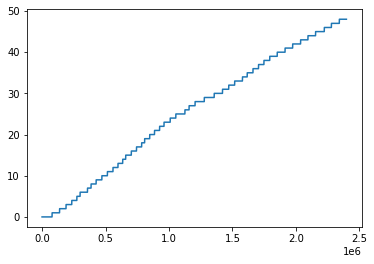

In [2]:
import numpy as np

E1_emg = E1['emg']
E2_emg = E2['emg']
E3_emg = E3['emg']

E1_acc = E1['acc']
E2_acc = E2['acc']
E3_acc = E3['acc']

E1_label = E1['restimulus']
E2_label = E2['restimulus']
E3_label = E3['restimulus']

index1 =[]
for i in range(len(E1_label)):
    if E1_label[i]!=0:
        index1.append(i)
label1 = E1_label[index1,:]
emg1 = E1_emg[index1,:]
acc1 = E1_acc[index1,:]

index2 =[]
for i in range(len(E2_label)):
    if E2_label[i]!=0:
        index2.append(i)
label2 = E2_label[index2,:]
emg2 = E2_emg[index2,:]
acc2 = E2_acc[index2,:]

index3 =[]
for i in range(len(E3_label)):
    if E3_label[i]!=0:
        index3.append(i)
label3 = E3_label[index3,:]
emg3 = E3_emg[index3,:]
acc3 = E3_acc[index3,:]

emg = np.vstack((emg1,emg2,emg3))
label = np.vstack((label1,label2,label3))
acc = np.vstack((acc1, acc2, acc3))
label = label-1

print(emg.shape)
print(label.shape)
print(acc.shape)
print(label)

plt.plot(label)

emg = emg * 20000

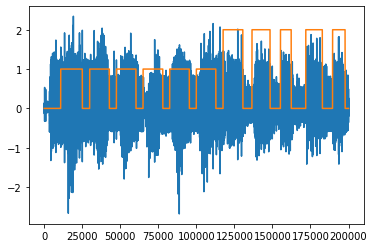

In [3]:
plt.plot(E1_emg[0:200000,0]*5000)
plt.plot(E1_label[0:200000])

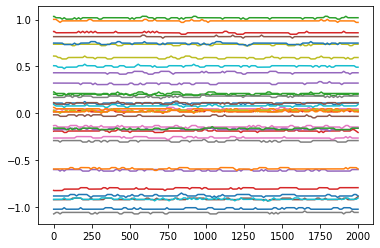

In [31]:
plt.plot(acc[10000:12000])

# 小波分解

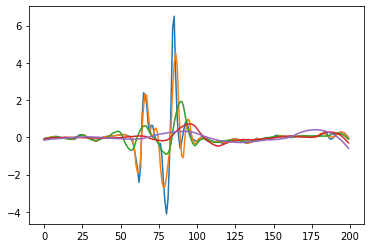

In [4]:
import pywt
import pywt.data

mode = pywt.Modes.smooth

def plot_signal_decomp(data, w, title):
    w = pywt.Wavelet(w) #选取小波函数
    a = data
    ca = [] #近似分量
    cd = [] #细节分量
    for i in range(5):
        (a, d) = pywt.dwt(a, w, mode) #进行5阶离散小波变换
        ca.append(a)
        cd.append(d)

    rec_a = []
    rec_d = []

    for i, coeff in enumerate(ca):
        coeff_list = [coeff, None] + [None] * i
        rec_a.append(pywt.waverec(coeff_list, w))#重构

    for i, coeff in enumerate(cd):
        coeff_list = [None, coeff] + [None] * i
        rec_d.append(pywt.waverec(coeff_list, w))

    return rec_a

    # fig = plt.figure()
    # ax_main = fig.add_subplot(len(rec_a) + 1, 1, 1)
    # ax_main.set_title(title)
    # ax_main.plot(data)
    # ax_main.set_xlim(0, len(data) - 1)

    # for i, y in enumerate(rec_a):
    #     ax = fig.add_subplot(len(rec_a) + 1, 2, 3 + i * 2)
    #     ax.plot(y, 'r')
    #     ax.set_xlim(0, len(y) - 1)
    #     ax.set_ylabel("A%d" % (i + 1))

    # for i, y in enumerate(rec_d):
    #     ax = fig.add_subplot(len(rec_d) + 1, 2, 4 + i * 2)
    #     ax.plot(y, 'g')
    #     ax.set_xlim(0, len(y) - 1)
    #     ax.set_ylabel("D%d" % (i + 1))

ecg = emg[0:200, 0]
output = plot_signal_decomp(ecg, 'sym5', "DWT")

for i in range(0, 5):
    plt.plot(output[i])


# EMD 分解

另一种

In [5]:
from PyEMD import EMD, EEMD, CEEMDAN, visualisation

emd = EMD()
eemd = EEMD()
ceemdan = CEEMDAN()


def  emd_gen(signal):
    emd_data = signal
    emd_data = emd.emd(emd_data)
    return emd_data

def eemd_gen(signal):
    eemd_data = signal
    eemd_data = eemd.eemd(eemd_data)
    return eemd_data

def ceemdan_gen(signal):
    ceemdan_data = signal
    ceemdan_data = ceemdan.ceemdan(ceemdan_data)
    return ceemdan_data

# plt.figure(figsize=(8, 8))
# plt.subplots_adjust(bottom=0.5)
# plt.figure(1)
# for i in range(0, 5):
#     plt.subplot(5, 1, i + 1)
#     plt.plot(emd_data[i])

# plt.figure(figsize=(8, 8))
# plt.subplots_adjust(bottom=0.5)
# plt.figure(2)
# for i in range(0, 5):
#     plt.subplot(5, 1, i + 1)
#     plt.plot(eemd_data[i])

# plt.figure(figsize=(8, 8))
# plt.subplots_adjust(bottom=0.5)
# plt.figure(3)
# for i in range(0, 5):
#     plt.subplot(5, 1, i + 1)
#     plt.plot(ceemdan_data[i])

ecg = emg[0:200, 0]
# print(emd_gen(ecg))


# 构造图像数据

In [32]:
import math
from sklearn.preprocessing import MinMaxScaler

imageData=[]
imageLabel=[]
imageLength=500     # 定义图片长度
stride = 100
classes = 49


flag = False
for i in range(classes): # classes
    index = [];
    for j in range(label.shape[0]):
        if(label[j,:]==i):
            index.append(j)
            
    iemg = emg[index,:]     # 某一个标签的肌电信号
    iacc = acc[index,:]

    length = iemg.shape[0]        # 此标签的序列长度
    start = 0
    end = imageLength
    print("class ",i," length: ", length)

    while end <= length: # length
        subImage = iemg[start:end, :]              # 单张图片
        subImageAcc = iacc[start:end, :]
        extSubImage = []

        for k in range(0, 12):                                          # 小波变换处理肌电信号
            output = plot_signal_decomp(subImage[:, k], 'sym5', "DWT")
            for obj in output:
                extSubImage.append(obj.tolist())
 
        fusedSubImage = extSubImage
        for k in range(0, 36):
            fusedSubImage.append(subImageAcc[:, k])

        extSubImage = list(map(list, zip(*extSubImage)))
        fusedSubImage = list(map(list, zip(*fusedSubImage)))

        # imageData.append(subImage)                                    # 原始肌电信号
        # imageData.append(subImageAcc)                                    # 加速度信号
        # imageData.append(extSubImage)                                 # 小波处理后
        imageData.append(fusedSubImage)                               # 融合信号 小波处理肌电 + 三轴加速度
        imageLabel.append(i)
        
        start = start + stride
        end = end + stride

imageData = np.array(imageData)
print(imageData.shape)
print(len(imageLabel))    

class  0  length:  78701
class  1  length:  58979
class  2  length:  50985
class  3  length:  45065
class  4  length:  40125
class  5  length:  25557
class  6  length:  58155
class  7  length:  28238
class  8  length:  39903
class  9  length:  45174
class  10  length:  43571
class  11  length:  44012
class  12  length:  39313
class  13  length:  37134
class  14  length:  23601
class  15  length:  44281
class  16  length:  40929
class  17  length:  40507
class  18  length:  23523
class  19  length:  39891
class  20  length:  37937
class  21  length:  40019
class  22  length:  34836
class  23  length:  48733
class  24  length:  44250
class  25  length:  71599
class  26  length:  32863
class  27  length:  47204
class  28  length:  72555
class  29  length:  78040
class  30  length:  65439
class  31  length:  49037
class  32  length:  46698
class  33  length:  61449
class  34  length:  37441
class  35  length:  45497
class  36  length:  43617
class  37  length:  42608
class  38  length:  45

: 

In [7]:
L = [[1, 2, 3],[4, 5, 6]]
print(L)
L = list(map(list, zip(*L)))	#转置
print(L)

[[1, 2, 3], [4, 5, 6]]
[[1, 4], [2, 5], [3, 6]]


# 保存h5文件

In [28]:
import h5py
# file = h5py.File('DB2//DB2_S1_feature_200_0.h5','w')  
# file.create_dataset('featureData', data = featureData)  
# file.create_dataset('featureLabel', data = featureLabel)  
# file.close()  

file = h5py.File('data/acc_500_36.h5','w')
file.create_dataset('imageData', data = imageData)
file.create_dataset('imageLabel', data = imageLabel)
file.close()